<a href="https://colab.research.google.com/github/pankajthakur3999/Exploratory-Data-Analysis/blob/main/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('ml-project')
jovian.set_colab_id('18lI7FM3FKTejSQd52z-vla1XT8GkmTd5')

# ml-project

Use the "Run" button to execute the code.

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="ml-project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pankajthakur3999/ml-project


'https://jovian.ai/pankajthakur3999/ml-project'

Here's an outline of the project:

1. Download the dataset
2. Explore & analyze the dataset
3. Prepare the dataset for ML training
4. Train hardcoded & baseline models
5. Make predictions & submit to Kaggle
6. Peform feature engineering
7. Train & evaluate different models
8. Tune hyperparameters for the best models
9. Train on a GPU with the entire dataset
10. Document & publish the project online

## 1. Download the Dataset

Steps:

- Install required libraries
- Download data from Kaggle
- View dataset files
- Load training set with Pandas
- Load test set with Pandas

Dataset link: https://www.kaggle.com/competitions/allstate-purchase-prediction-challenge/data

### Install Required Libraries

In [5]:
!pip install numpy pandas jovian opendatasets scikit-learn --quiet

In [6]:
import plotly.express as px
import numpy as np
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Download Data from Kaggle

We'll use the opendatasets library: https://github.com/JovianML/opendatasets

In [8]:
import opendatasets as od

In [9]:
dataset_url = 'https://www.kaggle.com/competitions/allstate-purchase-prediction-challenge/data'

In [10]:
od.download(dataset_url)

Skipping, found downloaded files in "./allstate-purchase-prediction-challenge" (use force=True to force download)


In [11]:
os.listdir('allstate-purchase-prediction-challenge')

['test_v2.csv.zip', 'train.csv.zip', 'sampleSubmission.csv']

In [12]:
train_df = pd.read_csv('./allstate-purchase-prediction-challenge/train.csv.zip', low_memory=False)

### Loading Training Set

Loading the entire dataset into Pandas is going to be slow, so we can use the following optimizations:


In [13]:
pd.set_option('display.max_columns', None)
train_df

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000000,1,0,0,08:35,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,2,633
1,10000000,2,0,0,08:38,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,1,630
2,10000000,3,0,0,08:38,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,1,630
3,10000000,4,0,0,08:39,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,1,630
4,10000000,5,0,0,11:55,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,1,630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665244,10152724,2,0,3,13:43,KY,10204,1,1,1,e,NaN,20,20,0,1.0,4.0,1,0,2,3,0,2,2,677
665245,10152724,3,0,3,13:43,KY,10204,1,1,1,e,NaN,20,20,0,1.0,4.0,1,0,2,3,0,2,2,677
665246,10152724,4,0,3,13:44,KY,10204,1,1,1,e,NaN,20,20,0,1.0,4.0,1,0,2,3,0,2,2,677
665247,10152724,5,0,3,13:46,KY,10204,1,1,1,e,NaN,20,20,0,1.0,4.0,1,0,2,3,0,2,2,685


The dataset contains `665249` rows and 25 columns. Each dataset of the row contains information about one customer.

Our objective is to find a way to estimate the value in the `cost` column using the values in the other columns. If we can do so for the historical data, then we should able to estimate cost for new customers too.

In [14]:
# Let's work with 10% of data
%%time
import random
sample_frac = 0.10

selected_cols = ['group_size', 'car_value', 'risk_factor', 'age_oldest', 'age_youngest', 'married_couple', 'C_previous', 'cost']
dtypes = {
    'group_size': 'int32',
    'risk_factor': 'float32',
    'age_oldest': 'int32',
    'age_youngest': 'int32',
    'married_couple': 'int32',
    'C_previous':'float32',
    'cost':'int32'
}

def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_frac

random.seed(42)
df = pd.read_csv('./allstate-purchase-prediction-challenge/train.csv.zip', usecols=selected_cols, dtype=dtypes, skiprows=skip_row)

CPU times: user 730 ms, sys: 18.1 ms, total: 749 ms
Wall time: 760 ms


In [15]:
df

,group_size,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,cost
0,2,g,3.0,46,42,1,1.0,630
1,2,g,3.0,46,42,1,1.0,638
2,1,e,4.0,28,28,0,3.0,755
3,1,e,4.0,28,28,0,3.0,730
4,1,c,NaN,43,43,0,2.0,607
...,...,...,...,...,...,...,...,...
66361,1,f,NaN,49,49,0,3.0,603
66362,1,d,4.0,52,52,0,1.0,663
66363,1,e,NaN,22,22,0,3.0,687
66364,2,e,2.0,75,75,1,4.0,628


### Load Test Set


In [16]:
test_df = pd.read_csv('./allstate-purchase-prediction-challenge/test_v2.csv.zip', usecols=selected_cols, dtype=dtypes, skiprows=skip_row, low_memory=False)

In [17]:
test_df

,group_size,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,cost
0,1,f,3.0,22,22,0,NaN,722
1,1,f,3.0,22,22,0,1.0,683
2,1,e,NaN,27,27,0,3.0,625
3,1,e,1.0,75,75,0,1.0,579
4,1,d,4.0,22,22,0,3.0,746
...,...,...,...,...,...,...,...,...
19890,1,f,4.0,51,51,0,1.0,553
19891,1,e,NaN,29,29,0,1.0,708
19892,1,e,1.0,23,23,0,3.0,592
19893,2,h,4.0,36,29,0,3.0,694


## 2. Explore the Dataset

- Basic info about training set
- Basic info about test set
- Exploratory data analysis & visualization
- Ask & answer questions

### Training Set

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66366 entries, 0 to 66365
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   group_size      66366 non-null  int32  
 1   car_value       66212 non-null  object 
 2   risk_factor     42437 non-null  float32
 3   age_oldest      66366 non-null  int32  
 4   age_youngest    66366 non-null  int32  
 5   married_couple  66366 non-null  int32  
 6   C_previous      64543 non-null  float32
 7   cost            66366 non-null  int32  
dtypes: float32(2), int32(5), object(1)
memory usage: 2.3+ MB


In [19]:
df.describe()

,group_size,risk_factor,age_oldest,age_youngest,married_couple,C_previous,cost
count,66366.000000,42437.000000,66366.000000,66366.000000,66366.000000,64543.000000,66366.000000
mean,1.232800,2.564625,45.026806,42.632493,0.208179,2.439351,635.727029
std,0.460007,1.112416,17.400655,17.454111,0.406009,1.034808,45.815417
min,1.000000,1.000000,18.000000,16.000000,0.000000,1.000000,294.000000
25%,1.000000,2.000000,28.000000,26.000000,0.000000,1.000000,605.000000
50%,1.000000,3.000000,44.000000,40.000000,0.000000,3.000000,635.000000
75%,1.000000,4.000000,60.000000,57.000000,0.000000,3.000000,665.000000
max,4.000000,4.000000,75.000000,75.000000,1.000000,4.000000,912.000000


In [20]:
df.isnull().sum()

group_size            0
car_value           154
risk_factor       23929
age_oldest            0
age_youngest          0
married_couple        0
C_previous         1823
cost                  0
dtype: int64

Here we will drop the null values

In [21]:
# Let's make a copy and drop the null values
df_for_training = df.copy().dropna()

In [22]:
df_for_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41715 entries, 0 to 66364
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   group_size      41715 non-null  int32  
 1   car_value       41715 non-null  object 
 2   risk_factor     41715 non-null  float32
 3   age_oldest      41715 non-null  int32  
 4   age_youngest    41715 non-null  int32  
 5   married_couple  41715 non-null  int32  
 6   C_previous      41715 non-null  float32
 7   cost            41715 non-null  int32  
dtypes: float32(2), int32(5), object(1)
memory usage: 1.8+ MB


In [23]:
df_for_training.isnull().sum()

group_size        0
car_value         0
risk_factor       0
age_oldest        0
age_youngest      0
married_couple    0
C_previous        0
cost              0
dtype: int64

Observations about training data:

- 41715 rows of data
- 

### Exploratory Data Analysis and Visualization

#### risk_factor
An ordinal assessment of how risky the customer is (1, 2, 3, 4)

In [24]:
df_for_training.risk_factor.describe()

count    41715.000000
mean         2.559775
std          1.113588
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: risk_factor, dtype: float64

In [25]:
df_for_training.risk_factor.value_counts()

3.0    11509
4.0    10855
1.0     9868
2.0     9483
Name: risk_factor, dtype: int64

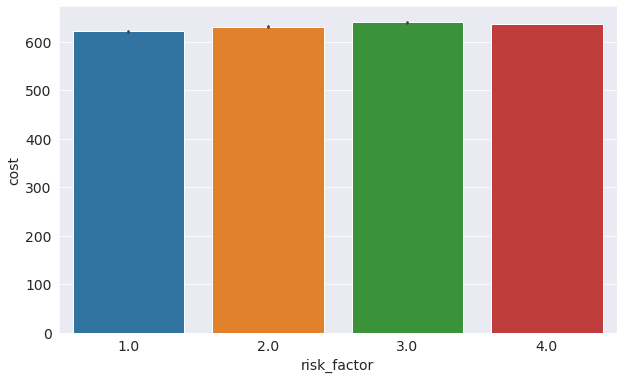

In [26]:
sns.barplot(data=df_for_training, x='risk_factor', y='cost');

Highest number of customers have rated `3` of their risk factor followed by rating `4`.

#### group_size

How many people will be covered under the policy (1, 2, 3 or 4)

In [27]:
df_for_training.group_size.describe()

count    41715.000000
mean         1.248520
std          0.470152
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: group_size, dtype: float64

In [28]:
df_for_training.group_size.value_counts()

1    32016
2     9078
3      574
4       47
Name: group_size, dtype: int64

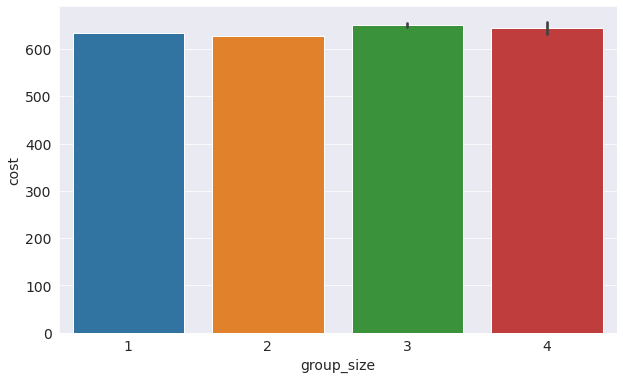

In [29]:
sns.barplot(data=df_for_training, x='group_size', y='cost');

Most of the customer has covered 3 person under policy followed by 4.

#### age_oldest

In [30]:
fig = px.strip(df_for_training, x='age_oldest', y='cost', title= "Age Oldest vs. Cost")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

From the above chart we can see cost is uniform for all ages.

In [31]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pankajthakur3999/ml-project


'https://jovian.ai/pankajthakur3999/ml-project'

In [32]:
fig = px.strip(df_for_training, x='age_youngest', y='cost', title= "Age Youngest vs. Cost")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

From the above chart we can see cost is uniform for all ages.

#### married_couple

Does the customer group contain a married couple (0=no, 1=yes)

In [33]:
df_for_training.married_couple.value_counts()

0    32278
1     9437
Name: married_couple, dtype: int64

In [34]:
fig = px.histogram(df_for_training, 
                   x='married_couple', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Married_couple')
fig.update_layout(bargap=0.1)
fig.show()

Let's check married couple column how it is related to cost.

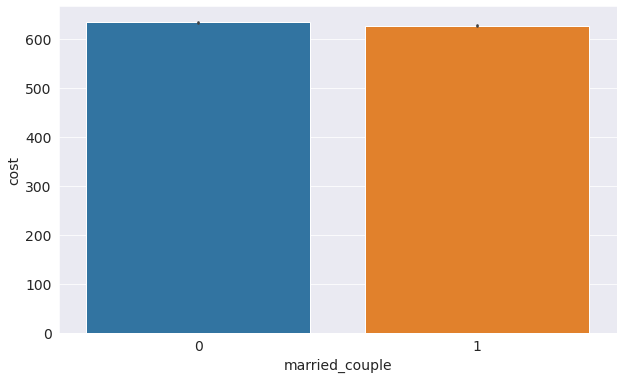

In [35]:
sns.barplot(data=df_for_training, x='married_couple', y='cost');

Most of the unmarried people have spent on purchasing the policy.

### C_previous


In [36]:
df_for_training.C_previous.value_counts()

3.0    19037
1.0     9018
4.0     7195
2.0     6465
Name: C_previous, dtype: int64

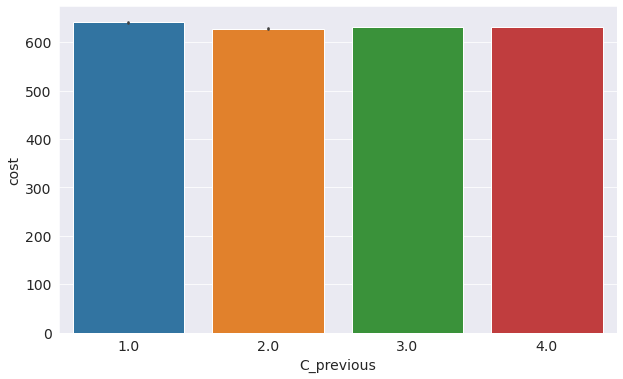

In [37]:
sns.barplot(data=df_for_training, x='C_previous', y='cost');

In [38]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pankajthakur3999/ml-project


'https://jovian.ai/pankajthakur3999/ml-project'

## 3. Prepare Dataset for Training

- Split Training & Validation Set
- Fill/Remove Missing Values
- Extract Inputs & Outputs
   - Training
   - Validation
   - Test
   ### Split Training & Validation Set

We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data. 

Since the test set and training set have the same date ranges, we can pick a random 20% fraction.

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
train_df, val_df = train_test_split(df_for_training, test_size=0.2, random_state=42)

In [41]:
len(train_df), len(val_df)

(33372, 8343)

### Extract Inputs and Outputs

In [42]:
df_for_training.columns

Index(['group_size', 'car_value', 'risk_factor', 'age_oldest', 'age_youngest',
       'married_couple', 'C_previous', 'cost'],
      dtype='object')

In [43]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pankajthakur3999/ml-project


'https://jovian.ai/pankajthakur3999/ml-project'

In [44]:
input_cols = ['group_size', 'risk_factor', 'age_oldest', 'age_youngest', 'married_couple']

In [45]:
target_col = 'cost'

#### Training

In [46]:
train_inputs = train_df[input_cols]

In [47]:
train_targets = train_df[target_col]

In [48]:
train_inputs

,group_size,risk_factor,age_oldest,age_youngest,married_couple
20693,1,2.0,24,24,0
34721,2,4.0,60,18,1
10494,1,3.0,48,48,0
35399,1,2.0,62,62,0
43623,1,3.0,24,24,0
...,...,...,...,...,...
9963,2,2.0,70,69,1
18005,1,4.0,42,42,0
60688,1,2.0,71,68,1
1386,2,3.0,32,31,0


In [49]:
train_targets

20693    573
34721    707
10494    655
35399    587
43623    746
        ... 
9963     644
18005    580
60688    601
1386     674
25164    589
Name: cost, Length: 33372, dtype: int32

#### Validation

In [50]:
val_inputs = val_df[input_cols]

In [51]:
val_targets = val_df[target_col]

In [52]:
val_inputs

,group_size,risk_factor,age_oldest,age_youngest,married_couple
19546,1,4.0,37,37,0
48990,2,1.0,64,51,1
10957,1,4.0,72,72,0
58611,1,2.0,55,55,0
2921,1,2.0,67,67,0
...,...,...,...,...,...
983,2,2.0,75,75,1
14795,2,1.0,75,74,1
45215,1,4.0,55,55,0
28422,1,4.0,26,26,0


In [53]:
val_targets

19546    640
48990    644
10957    642
58611    671
2921     533
        ... 
983      649
14795    610
45215    650
28422    628
57656    571
Name: cost, Length: 8343, dtype: int32

#### Test

In [54]:
test_inputs = test_df[input_cols]

In [55]:
test_inputs

,group_size,risk_factor,age_oldest,age_youngest,married_couple
0,1,3.0,22,22,0
1,1,3.0,22,22,0
2,1,NaN,27,27,0
3,1,1.0,75,75,0
4,1,4.0,22,22,0
...,...,...,...,...,...
19890,1,4.0,51,51,0
19891,1,NaN,29,29,0
19892,1,1.0,23,23,0
19893,2,4.0,36,29,0


In [56]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pankajthakur3999/ml-project


'https://jovian.ai/pankajthakur3999/ml-project'

### Train & Evaluate Hardcoded Model

Let's create a simple model that always predicts the average.

In [57]:
import numpy as np

In [58]:
class MeanRegressor():
    def fit(self, inputs, targets):
        self.mean = targets.mean()

    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)

In [59]:
mean_model = MeanRegressor()

In [60]:
mean_model.fit(train_inputs, train_targets)

In [61]:
mean_model.mean

632.6396679851373

In [62]:
train_preds = mean_model.predict(train_inputs)

In [63]:
train_preds

array([632.63966799, 632.63966799, 632.63966799, ..., 632.63966799,
       632.63966799, 632.63966799])

In [64]:
val_preds = mean_model.predict(val_inputs)

In [65]:
val_preds

array([632.63966799, 632.63966799, 632.63966799, ..., 632.63966799,
       632.63966799, 632.63966799])

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)

In [68]:
train_rmse

46.148605130266866

In [69]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pankajthakur3999/ml-project


'https://jovian.ai/pankajthakur3999/ml-project'

### Train & Evaluate Baseline Model

We'll traina linear regression model as our baseline, which tries to express the target as a weighted sum of the inputs.

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
linreg_model = LinearRegression()

In [72]:
linreg_model.fit(train_inputs, train_targets)

LinearRegression()

In [73]:
train_preds = linreg_model.predict(train_inputs)
train_preds

array([643.56419844, 660.03830131, 633.03110146, ..., 618.81966692,
       638.39728469, 622.32854972])

In [74]:
val_preds = linreg_model.predict(val_inputs)
val_preds

array([641.6687993 , 624.54608917, 622.49800449, ..., 631.8095334 ,
       647.69390625, 639.6039454 ])

In [75]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
train_rmse

44.573228356055836

In [76]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
val_rmse

44.424563708922776

In [77]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pankajthakur3999/ml-project


'https://jovian.ai/pankajthakur3999/ml-project'

## 5. Make Predictions and Submit to Kaggle

- Make predictions for test set
- Generate submissions CSV
- Submit to Kaggle
- Record in experiment tracking sheet

In [78]:
test_inputs

,group_size,risk_factor,age_oldest,age_youngest,married_couple
0,1,3.0,22,22,0
1,1,3.0,22,22,0
2,1,NaN,27,27,0
3,1,1.0,75,75,0
4,1,4.0,22,22,0
...,...,...,...,...,...
19890,1,4.0,51,51,0
19891,1,NaN,29,29,0
19892,1,1.0,23,23,0
19893,2,4.0,36,29,0


In [79]:
test_preds = linreg_model.predict(test_inputs)

ValueError: ignored

In [ ]:
submission_df = pd.read_csv(data_dir+'/sample_submission.csv')

In [ ]:
jovian.commit()